In [1]:
# Импорт библиотек
import math
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## t-тест двух независимых выборок

In [2]:
# Создаем данные
x1 = np.random.normal(0, 1.5, 100)
y1 = np.random.normal(0, 1.5, 100)

### Проверка на нормальность данных

In [3]:
# Тест Шапиро-Уилка
stat, p = stats.shapiro(x1)
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=0.988, p-value=0.482
Принять гипотезу о нормальности


###  Проверка гипотезы

In [4]:
# H0 - между выборками нет статистически значимых различий
# H1 - между выборками есть статистически значимые различия
stats.ttest_ind(x1, y1)

Ttest_indResult(statistic=0.33444714577170764, pvalue=0.7383961659785392)

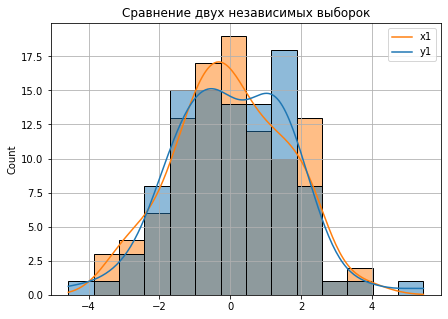

In [5]:
plt.figure(figsize=(7, 5))
df1 = pd.DataFrame({'x1':x1,'y2':y1})
sns.histplot(data=df1, kde=True)
plt.title('Сравнение двух независимых выборок')
plt.legend(['x1', 'y1'])
plt.grid()

## t-тест двух зависимых выборок

In [6]:
# Создаем данные
x2 = np.random.normal(0, 1.5, 100)
y2 = np.random.normal(1, 1.5, 100)

### Проверка на нормальность данных

In [7]:
# Критерий Пирсона
stat, p = stats.normaltest(x2)
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=8.337, p-value=0.015
Отклонить гипотезу о нормальности


### Проверка гипотезы

In [8]:
# H0 - между выборками нет статистически значимых различий
# H1 - между выборками есть статистически значимые различия
stats.ttest_rel(x2, y2)

Ttest_relResult(statistic=-5.031901491148424, pvalue=2.174025474814923e-06)

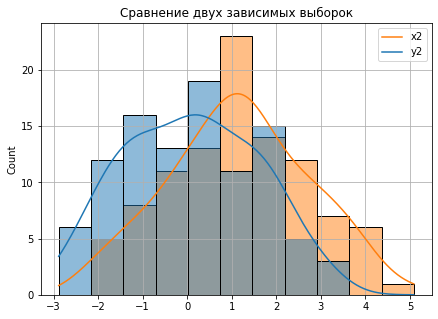

In [9]:
plt.figure(figsize=(7, 5))
df2 = pd.DataFrame({'x2':x2,'y2':y2})
sns.histplot(data=df2, kde=True)
plt.title('Сравнение двух зависимых выборок')
plt.legend(['x2', 'y2'])
plt.grid()

## Тест, отличается ли среднее выборки от N

In [10]:
N=3
stats.ttest_1samp(x2, N)

Ttest_1sampResult(statistic=-19.74622511259343, pvalue=4.1498589243937876e-36)

## Тест Fisher_Exact

In [11]:
df3 = pd.DataFrame([[10,15],[39,34]], index=['Рост','Снижение'], columns=['Прогноз','Факт'])
print(df3)

          Прогноз  Факт
Рост           10    15
Снижение       39    34


In [12]:
# H0 - эффект случайный
# H1 - эффект не случайный
oddsratio, pvalue = sp.stats.fisher_exact(df3)
print(pvalue)

0.35417955365927367


## Проверка принадлежности одной выборки другой

In [13]:
# Создаем данные
x4= [4, 5, 8, 9, 6, 7, 5, 6, 7, 8, 5, 6, 7, 0, 9, 8, 4, 6, 7, 9, 8, 6, 5, 7, 8, 9, 6, 7, 5, 8, 6, 7, 9, 5, 10]

y4 = [8, 5, 6, 7, 0, 1, 8, 4, 6, 7, 0, 2, 6, 5, 7, 5, 3, 5, 3, 5, 3, 5, 5, 8, 7, 
          6, 4, 5, 3, 5, 4, 6, 4, 5, 3, 2, 6, 4, 2, 6, 1, 0, 4, 3, 5, 4, 3, 4, 5, 4, 
          3, 4, 5, 4, 3, 4, 5, 3, 4, 4, 1, 2, 4, 3, 1, 2, 4, 3, 2, 1, 5, 3, 4, 6, 4, 
          5, 3, 2, 4, 5, 6, 4, 3, 1, 3, 5, 3, 4, 4, 4, 2, 5, 3]

In [14]:
# H0 - не принадлежит
# H1 - принадлежит

def mean_confidence_interval(data, confidence=0.90):
    n = len(data)
    m, se = np.mean(data), sp.stats.sem(data)
    h = se * sp.stats.t.ppf((1 + confidence) / 2, n)
    return m - h, m, m + h

print(mean_confidence_interval(x4, confidence=0.95))
print(mean_confidence_interval(y4, confidence=0.95))

(5.96231523540854, 6.628571428571429, 7.294827621734318)
(3.601578660531681, 3.967741935483871, 4.333905210436061)


In [15]:
stats.ttest_ind(x4 ,y4)

Ttest_indResult(statistic=7.35744682757447, pvalue=2.1159475572725764e-11)

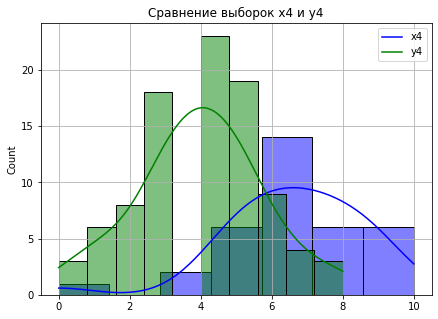

In [16]:
plt.figure(figsize=(7, 5))
sns.histplot(x4, kde=True, color='blue')
sns.histplot(y4, kde=True, color='green')
plt.title('Сравнение выборок x4 и y4')
plt.legend(['x4', 'y4'])
plt.grid()